In [1]:
import gymnasium as gym
print(gym.__version__)

0.26.1


## Cartpole

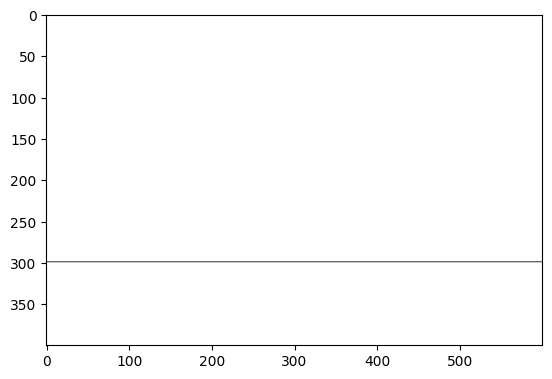

[-4.4627833 -9.169975   5.046544   2.3686776]


In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')

observation = env.reset()
print(f"observation = {observation}")

for _ in range(50):
    rgb_array = env.render()
    plt.imshow(rgb_array)
    display.clear_output(wait = True)
    display.display(plt.gcf())
    observation, reward, terminated, truncated, info = env.step(0)
    print(observation)
plt.close()
env.close()

## Cartpole eazy algorithm

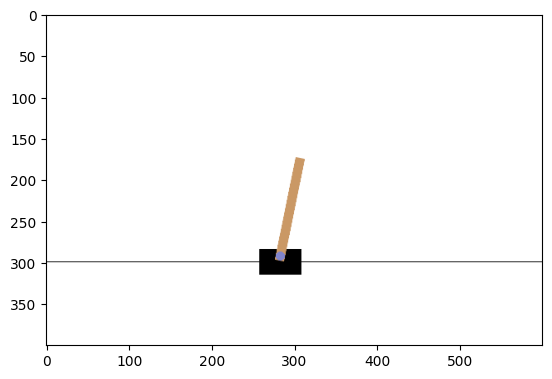

[-0.14361162 -0.23302174  0.21363914  0.37579438] True
39


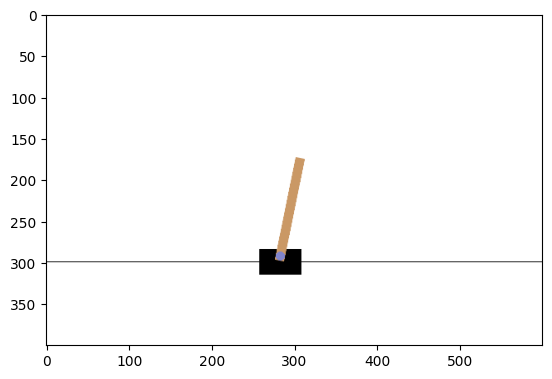

In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset(seed=17)

for i in range(1, 40):
    rgb_array = env.render()
    # if 막대기가 오른쪽으로 기울어져 있다면: 오른쪽으로 힘을 가함
    # else: 왼쪽으로 힘을 가함

    # Eazy Control
    if observation[2] > 0:
        action = 1
    else: action = 0
    
    plt.imshow(rgb_array)
    display.clear_output(wait = True)
    display.display(plt.gcf())

    observation, reward, terminated, truncated, info = env.step(action)
    print(observation, terminated)
    if terminated:
        print(i)
        break
env.close()

## Neural Network Cartpole

In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset(seed=17)

for step_index in range(1000):
    rgb_array = env.render()
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    print(f"Step {step_index}")
    print(f"action: {action}")
    print(f"observation: {observation}")
    print(f"reward: {reward}")
    print(f"terminated: {terminated}")
    print(f"info: {info}")
    print(f"truncated: {truncated}")
    print("-"*80)
    if terminated:
        break

Step 0
action: 1
observation: [ 0.03382942  0.16113597  0.00551061 -0.30404744]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 1
action: 1
observation: [ 3.7052143e-02  3.5617897e-01 -5.7033426e-04 -5.9498739e-01]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 2
action: 1
observation: [ 0.04417573  0.5513089  -0.01247008 -0.88784987]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 3
action: 0
observation: [ 0.0552019   0.35635838 -0.03022708 -0.599113  ]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 4
action: 1
observation: [ 0.06232907  0.5518899  -0.04220934 -0.90116173]
reward: 1.0
terminated: False
info: {}
t

https://github.com/SaravananJaichandar/CartPole-Balancing-using-Neural-Network/tree/master

In [32]:
import random
import numpy as np
import gymnasium as gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow.python.keras.activations'

In [34]:
print("TensorFlow version:", tf.__version__)

AttributeError: module 'tensorflow' has no attribute '__version__'

In [14]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
env.reset(seed=17)

goal_steps = 500
score_requirement = 60
initial_games = 5000

In [15]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(initial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 2)
            observation, reward, terminated, truncated, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            score += reward
            if terminated:
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                if data[1] == 1:
                    output = [0, 1]
                elif data[1] == 0:
                    output = [1, 0]
                training_data.append([data[0], output])
        
        env.reset()

    print(accepted_scores)
    
    return training_data

In [16]:
training_data = model_data_preparation()

[62.0, 66.0, 69.0, 65.0, 98.0, 71.0, 93.0, 62.0, 78.0, 61.0, 77.0, 60.0, 63.0, 70.0, 69.0, 85.0, 62.0, 66.0, 64.0, 60.0, 79.0, 65.0, 68.0, 81.0, 69.0, 65.0, 83.0, 60.0, 68.0, 79.0, 62.0, 85.0, 78.0, 67.0, 61.0, 60.0, 62.0, 73.0, 60.0, 60.0, 72.0, 79.0, 67.0, 61.0, 70.0, 79.0, 77.0, 87.0, 120.0, 68.0, 65.0, 69.0, 60.0, 63.0, 120.0, 62.0, 78.0, 69.0, 63.0, 61.0, 67.0, 79.0, 69.0, 72.0, 82.0, 61.0, 72.0, 62.0, 69.0, 62.0, 79.0, 85.0, 77.0, 64.0, 62.0, 66.0, 66.0, 68.0, 71.0]


In [17]:
def build_model(input_size, output_size):
    model = Sequential()
    model.add(Dense(128, input_dim=input_size, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_size, activation='linear'))
    model.compile(loss='mse', optimizer=Adam())

    return model

In [18]:
def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    print(X)
    print(y)
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=10)
    return model

In [19]:
trained_model = train_model(training_data)

[[ 0.01862215  0.17759071 -0.04481664 -0.299513  ]
 [ 0.02217397 -0.01686472 -0.05080691 -0.02129443]
 [ 0.02183667 -0.21122263 -0.05123279  0.2549354 ]
 ...
 [-0.38353524 -0.7291338   0.16779003  0.97137636]
 [-0.3981179  -0.53661245  0.18721755  0.73574907]
 [-0.40885013 -0.34450182  0.20193253  0.50733954]]
[[1 0]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]
Epoch 1/10
173/173 [==============================] - 0s 584us/step - loss: 0.2637
Epoch 2/10
173/173 [==============================] - 0s 599us/step - loss: 0.2352
Epoch 3/10
173/173 [==============================] - 0s 581us/step - loss: 0.2340
Epoch 4/10
173/173 [==============================] - 0s 580us/step - loss: 0.2337
Epoch 5/10
173/173 [==============================] - 0s 583us/step - loss: 0.2330
Epoch 6/10
173/173 [==============================] - 0s 596us/step - loss: 0.2329
Epoch 7/10
173/173 [==============================] - 0s 620us/step - loss: 0.2324
Epoch 8/10
173/173 [==============================] - 0s 62

KeyboardInterrupt: 

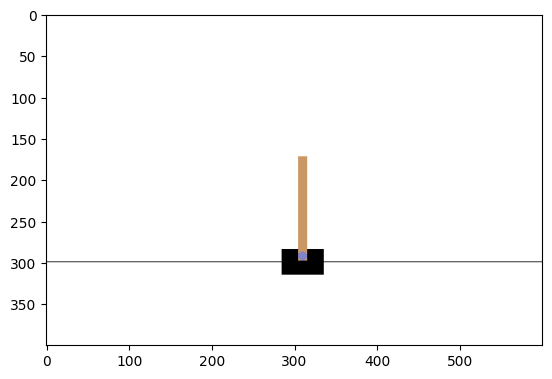

In [20]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        rgb_array = env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        plt.imshow(rgb_array)
        display.clear_output(wait = True)
        display.display(plt.gcf())
        choices.append(action)
        new_observation, reward, terminated, truncated, info = env.step(action)
        
        prev_obs = new_observation
        score+=reward
        if terminated:
            break

    env.reset()
    scores.append(score)

print(scores)
print('Average Score:',sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))